## Student Name: Vasu Deva Sai Nadha Reddy Janapala
## Student Email: vasu.janapala@ou.edu

# Project 3: The Smart City Slicker

Imagine you are a stakeholder in a rising Smart City and want to know more about themes and concepts about existing smart cities. You also want to know where does your smart city place among others. In this project, you will perform 
exploratory data analysis, often shortened to EDA, to examine a data from the [2015 Smart City Challenge](https://www.transportation.gov/smartcity) to find facts about the data and communicating those facts through text analysis and visualizations.

In order to explore the data and visualize it, some modifications might need to be made to the data along the way. This is often referred to as data preprocessing or cleaning.
Though data preprocessing is technically different from EDA, EDA often exposes problems with the data that need to be fixed in order to continue exploring.
Because of this tight coupling, you have to clean the data as necessary to help understand the data.

In this project, you will apply your knowledge about data cleaning, machine learning, visualizations, and databases to explore smart city applications.

**Part 1** of the notebook will explore and clean the data. \
**Part 2** will take the results of the preprocessed data to create models and visualizations.

Empty cells are code cells. 
Cells denoted with [Your Answer Here] are markdown cells.
Edit and add as many cells as needed.

Output file for this notebook is shown as a table for display purposes. Note: The city name can be Norman, OK or OK Norman.

| city | raw text | clean text | clusterid | topicids | summary | keywords|
| -- | -- | -- | -- | -- | -- | -- |
|Norman, OK | Test, test , and testing. | test test test | 0 | T1, T2| test | test |

## Introduction
The Dataset: 2015 Smart City Challenge Applicants (non-finalist).
In this project you will use the applicant's PDFs as a dataset.
The dataset is from the U.S Department of Transportation Smart City Challenge.

On the website page for the data, you can find some basic information about the challenge. This is an interesting dataset. Think of the questions that you might be able to answer! A few could be:

1. Can I identify frequently occurring words that could be removed during data preprocessing?
2. Where are the applicants from?
3. Are there multiple entries for the same city in different applicantions?
4. What are the major themes and concepts from the smart city applicants?

Let's load the data!

## Loading and Handling files

Load data from `smartcity/`. 

To extract the data from the pdf files, use the [pypdf.pdf.PdfFileReader](https://pypdf.readthedocs.io/en/stable/index.html) class.
It will allow you to extract pages and pdf files and add them to a data structure (dataframe, list, dictionary, etc).
To install the module, use the command `pipenv install pypdf`.
You only need to handle PDF files, handling docx is not necessary.

In [1]:
# Reading the pdf

from pypdf import PdfReader
import os
import pandas as pd

def extract_text_function(filename):
     with open(filename, 'rb') as file:
        # Create a PDF reader object
        pdf_reader = PdfReader(file)

        # Get the total number of pages in the PDF
        num_pages = len(pdf_reader.pages)
        text = ""

        # Loop through each page in the PDF
        for page_num in range(num_pages):
            # Get the text from the current page
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
        return text

folder_path = 'smartcity'
file_list = []
for filename in os.listdir(folder_path):
    if filename.endswith(".pdf"):
        file_list.append(os.path.join(folder_path, filename))

# extract text from each file and store in a list
text_list = []
for file in file_list:
    text_list.append(extract_text_function(file))

Create a data structure to add the city name and raw text. You can choose to split the city name from the file.

In [2]:
dataframe = pd.DataFrame()
city_name = []
state_name = []
count = 0
for f in file_list:
    count += 1
    if 'DC_0' not in f:
        text_between = f[f.find("\\")+1:f.find(".pdf")]
        state = text_between.split()[0]
        city = text_between.split()[1]
        state_name.append(state)
        city_name.append(city)
raw_text = []
count2 = 0
for t in text_list:
    count2 += 1
    if count == count2:
        continue
    raw_text.append(t)
dataframe['State Name'] = state_name
dataframe['City Name'] = city_name
dataframe['Raw Text'] = raw_text

In [3]:
dataframe.head()

,State Name,City Name,Raw Text
0,AK,Anchorage,CONTENTS \n1 VISION .............................
1,AL,Birmingham,aBirmingham\nRising\nBirmingham Rising! Meetin...
2,AL,Montgomery,\n \n U.S. Department of Transportation - “BE...
3,AZ,Scottsdale,\n \n \n \n \nFederal Agency Name: U.S. D...
4,AZ,Tucson,Tucson Smart City Demonstration Proposal\nPart...


## Cleaning Up PDFs

One of the more frustrating aspects of PDF is loading the data into a readable format. The first order of business will be to preprocess the data. To start, you can use code provided by Text Analytics with Python, [Chapter 3](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch03%20-%20Processing%20and%20Understanding%20Text/Ch03a%20-%20Text%20Wrangling.ipynb): [contractions.py](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch05%20-%20Text%20Classification/contractions.py) (Pages 136-137), and [text_normalizer.py](https://github.com/dipanjanS/text-analytics-with-python/blob/master/New-Second-Edition/Ch05%20-%20Text%20Classification/text_normalizer.py) (Pages 155-156). Feel free to download the scripts or add the code directly to the notebook (please note this code is performed on dataframes).

In addition to the data cleaning provided by the textbook, you will need to:
1. Consider removing terms that may effect clustering and topic modeling. Words to consider are cities, states, common words (smart, city, page, etc.). Keep in mind n-gram combinations are important; this can also be revisited later depending on your model's performance.
2. Check the data to remove applicants that text was not processed correctly. Do not remove more than 15 cities from the data.


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 01 01:11:02 2016

@author: DIP
"""

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

import nltk
import spacy
import unicodedata
import re
from nltk.corpus import wordnet
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup


custom_stopwords = ['city', 'smart', 'cities', 'states', 'page','US','transportation', 'vehicles', 'vehicle']
tokenizer = ToktokTokenizer()
nlp = spacy.load("en_core_web_md")
stopword_list = set(nltk.corpus.stopwords.words('english'))
stopword_list.update(custom_stopwords)

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    if bool(soup.find()):
        [s.extract() for s in soup(['iframe', 'script'])]
        stripped_text = soup.get_text()
        stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    else:
        stripped_text = text
    return stripped_text

def simple_porter_stemming(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]|\[|\]' if not remove_digits else r'[^a-zA-Z\s]|\[|\]'
    text = re.sub(pattern, '', text)
    return text

def remove_stopwords(text, is_lower_case=False, stopwords=stopword_list):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def normalize_corpus(corpus):
    text = strip_html_tags(corpus)
    text = text.translate(text.maketrans("\n\t\r", "   "))
    text = remove_accented_chars(text)
    text = expand_contractions(text)
    text = lemmatize_text(text)
    text = simple_porter_stemming(text)
    text = remove_special_characters(text)
    text = re.sub(' +', ' ', text)
    text = remove_stopwords(text)
        
    return text


#### Add the cleaned text to the structure you created.


In [5]:
dataframe['Cleared Text'] = dataframe['Raw Text'].apply(normalize_corpus)

Added the cleaned Text

In [6]:
dataframe.head()

,State Name,City Name,Raw Text,Cleared Text
0,AK,Anchorage,CONTENTS \n1 VISION .............................,content 1 vision 1 2 popul 3 3 characterist 3 ...
1,AL,Birmingham,aBirmingham\nRising\nBirmingham Rising! Meetin...,abirmingham rise birmingham rise meet challeng...
2,AL,Montgomery,\n \n U.S. Department of Transportation - “BE...,us depart transport beyond traffic citi challe...
3,AZ,Scottsdale,\n \n \n \n \nFederal Agency Name: U.S. D...,feder agenc name us depart transport usdot fed...
4,AZ,Tucson,Tucson Smart City Demonstration Proposal\nPart...,tucson citi demonstr propos part 1 vision narr...


In [7]:
def generate_ngrams(text, n, chunk_size):
    # split the text into words
    words = text.split()
    
    # create chunks of words of size chunk_size
    chunks = [words[i:i+chunk_size] for i in range(0, len(words), chunk_size)]
    
    # generate n-grams from each chunk
    ngrams_list = [tuple(zip(*(chunk[i:] for i in range(n)))) for chunk in chunks]
    
    # flatten the list of n-grams
    flattened_ngrams = [ngram for chunk_ngrams in ngrams_list for ngram in chunk_ngrams]
    
    return flattened_ngrams

n = 3
chunk_size = 5

dataframe['Ngrams'] = dataframe['Cleared Text'].apply(lambda x: generate_ngrams(x, n, chunk_size))


In [8]:
dataframe.head()

,State Name,City Name,Raw Text,Cleared Text,Ngrams
0,AK,Anchorage,CONTENTS \n1 VISION .............................,content 1 vision 1 2 popul 3 3 characterist 3 ...,"[(content, 1, vision), (1, vision, 1), (vision..."
1,AL,Birmingham,aBirmingham\nRising\nBirmingham Rising! Meetin...,abirmingham rise birmingham rise meet challeng...,"[(abirmingham, rise, birmingham), (rise, birmi..."
2,AL,Montgomery,\n \n U.S. Department of Transportation - “BE...,us depart transport beyond traffic citi challe...,"[(us, depart, transport), (depart, transport, ..."
3,AZ,Scottsdale,\n \n \n \n \nFederal Agency Name: U.S. D...,feder agenc name us depart transport usdot fed...,"[(feder, agenc, name), (agenc, name, us), (nam..."
4,AZ,Tucson,Tucson Smart City Demonstration Proposal\nPart...,tucson citi demonstr propos part 1 vision narr...,"[(tucson, citi, demonstr), (citi, demonstr, pr..."


### Clean Up: Discussion
Answer the questions below.

#### Which Smart City applicants did you remove? What issues did you see with the documents?

I have ignored the .doc extention files, which are not the pdf files.
Also, I have removed the DC_0 file which define the entire state but not the city.

#### Explain what additional text processing methods you used and why.

Eliminating words that are common and have little semantic value.
Generating n-grams is a common technique used in text processing and feature engineering for NLP tasks such as language modeling, text classification, and information retrieval. The generate_ngrams function takes a text string as input, and generates n-grams of a specified size n and chunk size.

#### Did you identify any potientally problematic words?

Words that are used frequently can often be problematic, which is why a list of stopwords is utilized to remove them.

## Experimenting with Clustering Models

Now, you'll start to explore models to find the optimal clustering model. In this section, you'll explore [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [Hierarchical](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), and [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) clustering algorithms.
Create these algorithms with k_clusters for K-means and Hierarchical.
For each cell in the table provide the [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score), [Calinski and Harabasz score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score), and [Davies-Bouldin score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score).

In each cell, create an array to store the values.
For example, 

|Algorithm| k = 9 | k = 18| k = 36 | Optimal k| 
|--|--|--|--|--|
|K-means| [S,CH,DB]| [S,CH,DB] | [S,CH,DB] | [S,CH,DB] |
|Hierarchical |[S,CH,DB]| [S,CH,DB]| [S,CH,DB] | [S,CH,DB]|
|DBSCAN | X | X | X | [S,CH,DB] |



### Optimality 
You will need to find the optimal k for K-means and Hierarchical algorithms.
Find the optimality for k in the range 2 to 50.
Provide the code used to generate the optimal k and provide justification for your approach.


|Algorithm| k = 9 | k = 18| k = 36 | Optimal k| 
|--|--|--|--|--|
|K-means|--|--|--|--|
|Hierarchical |--|--|--|--|
|DBSCAN | X | X | X | -- |



c:\Users\janap\.virtualenvs\project3_text-Z-n56NjU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\janap\.virtualenvs\project3_text-Z-n56NjU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\janap\.virtualenvs\project3_text-Z-n56NjU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\janap\.virtualenvs\project3_text-Z-n56NjU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

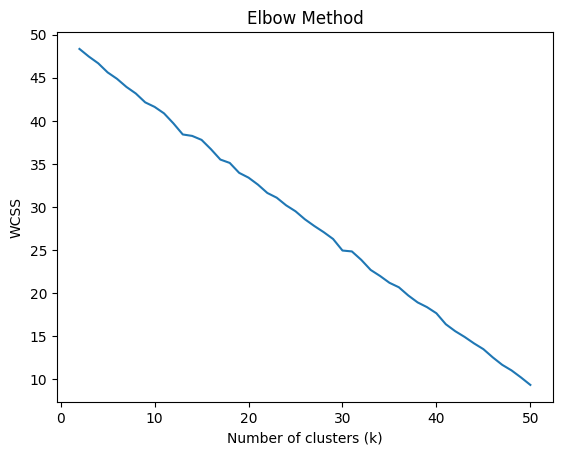

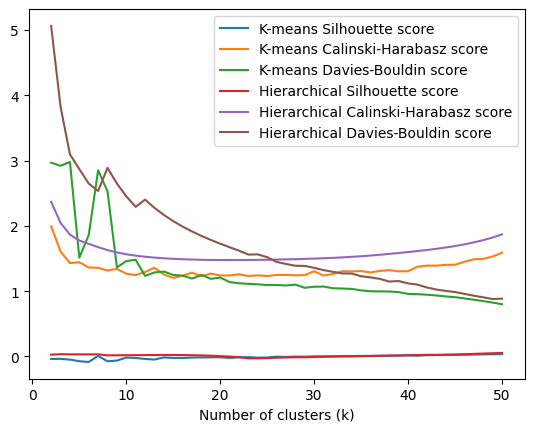

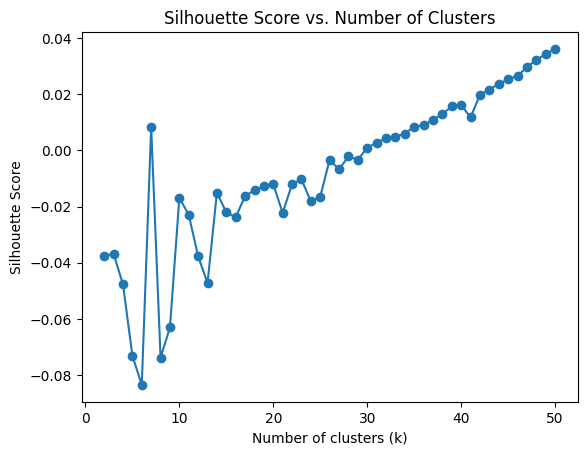

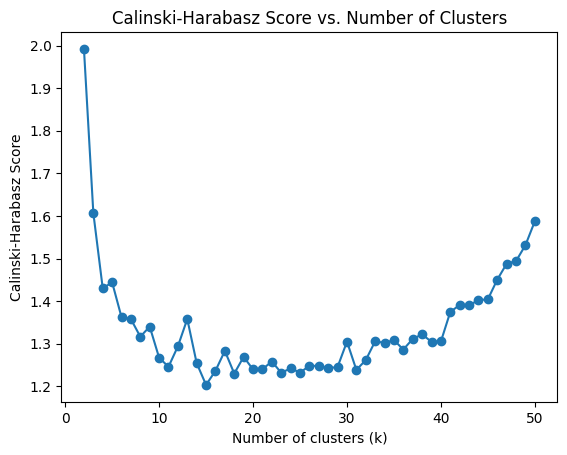

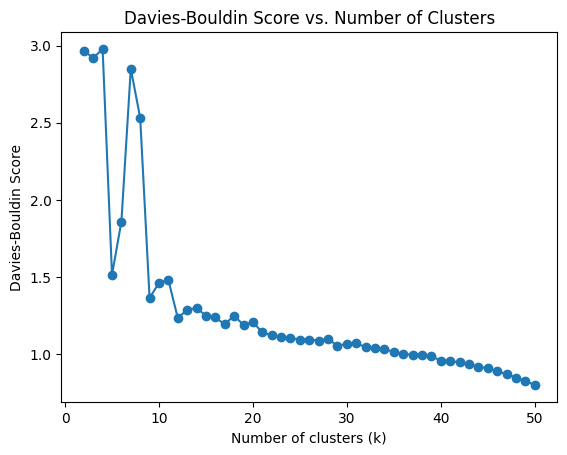

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataframe['Cleared Text'])

# initialize empty lists for the metrics
silhouette_scores_K = []
calinski_scores_K = []
davies_scores_K = []
silhouette_scores_H = []
calinski_scores_H = []
davies_scores_H = []
wcss = []

# loop over each k value
for k in range(2, 51):
    # create a MiniBatchKMeans object with the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # fit the KMeans object to the data
    kmeans_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    
    # get the predicted cluster labels and compute the metrics
    silhouette_K = silhouette_score(X.toarray(), kmeans_labels)
    calinski_K = calinski_harabasz_score(X.toarray(), kmeans_labels)
    davies_K = davies_bouldin_score(X.toarray(), kmeans_labels)

    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X.toarray())
    silhouette_H = silhouette_score(X, hierarchical_labels)
    calinski_H = calinski_harabasz_score(X.toarray(), hierarchical_labels)
    davies_H = davies_bouldin_score(X.toarray(), hierarchical_labels)
    
    
    # append the metrics to the corresponding lists
    silhouette_scores_K.append(silhouette_K)
    calinski_scores_K.append(calinski_K)
    davies_scores_K.append(davies_K)

    silhouette_scores_H.append(silhouette_H)
    calinski_scores_H.append(calinski_H)
    davies_scores_H.append(davies_H)

plt.plot(range(2, 51), wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

plt.plot(range(2, 51), silhouette_scores_K, label='K-means Silhouette score')
plt.plot(range(2, 51), calinski_scores_K, label='K-means Calinski-Harabasz score')
plt.plot(range(2, 51), davies_scores_K, label='K-means Davies-Bouldin score')
plt.plot(range(2, 51), silhouette_scores_H, label='Hierarchical Silhouette score')
plt.plot(range(2, 51), calinski_scores_H, label='Hierarchical Calinski-Harabasz score')
plt.plot(range(2, 51), davies_scores_H, label='Hierarchical Davies-Bouldin score')
plt.xlabel('Number of clusters (k)')
plt.legend()
plt.show()

# plot the silhouette scores
plt.plot(range(2, 51), silhouette_scores_K, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# plot the Calinski-Harabasz scores
plt.plot(range(2, 51), calinski_scores_K, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.show()

# plot the Davies-Bouldin scores
plt.plot(range(2, 51), davies_scores_K, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.show()

In [10]:
import numpy as np
optimal_s_k = range(2,51)[np.argmax(silhouette_scores_K)]
optimal_c_k = range(2,51)[np.argmax(calinski_scores_K)]
optimal_d_k = range(2,51)[np.argmin(davies_scores_K)]

optimal_s_h = range(2,51)[np.argmax(silhouette_scores_H)]
optimal_c_h = range(2,51)[np.argmax(calinski_scores_H)]
optimal_d_h = range(2,51)[np.argmin(davies_scores_H)]

In [11]:
print("optimal K value for silhouette score KMeans: ", optimal_s_k)
print("optimal K value for calinski score KMeans: ", optimal_c_k)
print("optimal K value for davies score KMeans: ", optimal_d_k)
print("optimal K value for silhouette score Hierarchical: ", optimal_s_h)
print("optimal K value for calinski score Hierarchical: ", optimal_c_h)
print("optimal K value for davies score Hierarchical: ", optimal_d_h)



optimal K value for silhouette score KMeans:  50
optimal K value for calinski score KMeans:  2
optimal K value for davies score KMeans:  50
optimal K value for silhouette score Hierarchical:  50
optimal K value for calinski score Hierarchical:  2
optimal K value for davies score Hierarchical:  49


In [12]:
from sklearn.cluster import DBSCAN

#Finding Optimal K for DB scan
silhouette_scores_D = []
calinski_scores_D = []
davies_scores_D = []

#DB-scan
dbscan = DBSCAN(eps=1, min_samples=17)
dbscan_labels = dbscan.fit_predict(X.toarray())
silhouette_D = silhouette_score(X, dbscan_labels)
calinski_D = calinski_harabasz_score(X.toarray(), dbscan_labels)
davies_D = davies_bouldin_score(X.toarray(), dbscan_labels)

silhouette_scores_D.append(silhouette_D)
calinski_scores_D.append(calinski_D)
davies_scores_D.append(davies_D)

print(silhouette_scores_D)
print(calinski_scores_D)
print(davies_scores_D)

[0.011676750876301182]
[1.0547779343152686]
[7.452646122809267]


In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataframe['Cleared Text'])

kmeans = KMeans(2, random_state=42)

# fit the KMeans object to the data
kmeans_labels = kmeans.fit_predict(X)

c:\Users\janap\.virtualenvs\project3_text-Z-n56NjU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
print(kmeans_labels)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


In [15]:
# To store the results
results_kmeans = []
results_hierarchical = []
results_dbscan = []

for k in range(2, 50):
    kmeans_list = [
        round(silhouette_scores_K[k-2], 3),
        round(calinski_scores_K[k-2], 3),
        round(davies_scores_K[k-2], 3)
    ]

    hierarchical_list = [
        round(silhouette_scores_H[k-2], 3),
        round(calinski_scores_H[k-2], 3),
        round(davies_scores_H[k-2], 3)
    ]
    
    dbscan_list = ["X", "X", "X"]
    
    # Appending the results
    results_kmeans.append(kmeans_list)
    results_hierarchical.append(hierarchical_list)
    results_dbscan.append(dbscan_list)

# Dataframe
data = {
    "Algorithm": ["K-means", "Hierarchical", "DBSCAN"],
    "Optimal k": ["2", "2", "min_samples = 10"]
}
for k in range(2, 50):
    data[f"k={k}"] = [
        results_kmeans[k-2],
        results_hierarchical[k-2],
        results_dbscan[k-2]
    ]
df_score = pd.DataFrame(data)
df_score = df_score[["Algorithm"] + [f"k={k}" for k in range(2, 50)] + ["Optimal k"]] # move "Optimal k" column to the end

df_score.head()


,Algorithm,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9,k=10,...,k=41,k=42,k=43,k=44,k=45,k=46,k=47,k=48,k=49,Optimal k
0,K-means,"[-0.037, 1.992, 2.967]","[-0.037, 1.607, 2.919]","[-0.048, 1.43, 2.979]","[-0.073, 1.444, 1.513]","[-0.083, 1.362, 1.859]","[0.008, 1.358, 2.85]","[-0.074, 1.317, 2.531]","[-0.063, 1.34, 1.364]","[-0.017, 1.267, 1.461]",...,"[0.012, 1.375, 0.955]","[0.02, 1.391, 0.945]","[0.022, 1.391, 0.934]","[0.024, 1.402, 0.919]","[0.025, 1.405, 0.908]","[0.027, 1.451, 0.889]","[0.03, 1.488, 0.869]","[0.032, 1.494, 0.848]","[0.034, 1.532, 0.825]",2
1,Hierarchical,"[0.028, 2.368, 5.061]","[0.035, 2.046, 3.825]","[0.032, 1.866, 3.095]","[0.032, 1.776, 2.869]","[0.032, 1.725, 2.648]","[0.033, 1.674, 2.533]","[0.017, 1.629, 2.889]","[0.018, 1.593, 2.648]","[0.019, 1.565, 2.452]",...,"[0.022, 1.614, 1.1]","[0.025, 1.63, 1.056]","[0.025, 1.648, 1.025]","[0.028, 1.668, 1.004]","[0.03, 1.691, 0.987]","[0.035, 1.717, 0.958]","[0.04, 1.747, 0.93]","[0.045, 1.781, 0.906]","[0.049, 1.822, 0.879]",2
2,DBSCAN,"[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]",...,"[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]","[X, X, X]",min_samples = 10


#### How did you approach finding the optimal k?

I tried doing it with the help of elbow method. But here I am bit confused as the graph was like a slope in it. When I check the optimal k value for different scores, I found different values. To get these values I have iterated over a range of k values and calculated each score for each value, we can identify the value of k that gives the highest or lowest score, which is considered to be the optimal number of clusters. This approach is useful when the elbow plot is not clear.
I am going with KMeans with calinski score as 2.

#### What algorithm do you believe is the best? Why?

As the data is well-separated and will have a clear number of clusters, so I prefer KMeans over other algorithms. If the data is noisy I would have prefered DBSCAN over other algorithm which is great in handling such data.

### Add Cluster ID to output file
In your data structure, add the cluster id for each smart city respectively. Show the to append the clusterid code below.

In [16]:
dataframe['Cluster ID'] = kmeans_labels

In [17]:
dataframe.head()

,State Name,City Name,Raw Text,Cleared Text,Ngrams,Cluster ID
0,AK,Anchorage,CONTENTS \n1 VISION .............................,content 1 vision 1 2 popul 3 3 characterist 3 ...,"[(content, 1, vision), (1, vision, 1), (vision...",1
1,AL,Birmingham,aBirmingham\nRising\nBirmingham Rising! Meetin...,abirmingham rise birmingham rise meet challeng...,"[(abirmingham, rise, birmingham), (rise, birmi...",1
2,AL,Montgomery,\n \n U.S. Department of Transportation - “BE...,us depart transport beyond traffic citi challe...,"[(us, depart, transport), (depart, transport, ...",1
3,AZ,Scottsdale,\n \n \n \n \nFederal Agency Name: U.S. D...,feder agenc name us depart transport usdot fed...,"[(feder, agenc, name), (agenc, name, us), (nam...",1
4,AZ,Tucson,Tucson Smart City Demonstration Proposal\nPart...,tucson citi demonstr propos part 1 vision narr...,"[(tucson, citi, demonstr), (citi, demonstr, pr...",1


### Save Model

After finding the best model, it is desirable to have a way to persist the model for future use without having to retrain. Save the model using [model persistance](https://scikit-learn.org/stable/model_persistence.html). This model should be saved in the same directory as this notebook and should be loaded as the model for your `project3.py`.

Save the model as `model.pkl`. You do not have to use pickle, but be sure to save the persistance using one of the methods listed in the link.

In [18]:
import pickle

# save your model and vectorizer to a file using pickle.dump()
with open('model.pkl', 'wb') as file:
    pickle.dump((kmeans, vectorizer), file)

# load your model and vectorizer from the saved file using pickle.load()
with open('model.pkl', 'rb') as file:
    loaded_model, loaded_vectorizer_k = pickle.load(file)


## Derving Themes and Concepts

Perform Topic Modeling on the cleaned data. Provide the top five words for `TOPIC_NUM = Best_k` as defined in the section above. Feel free to reference [Chapter 6](https://github.com/dipanjanS/text-analytics-with-python/tree/master/New-Second-Edition/Ch06%20-%20Text%20Summarization%20and%20Topic%20Models) for more information on Topic Modeling and Summarization.

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pickle

# Fit the CountVectorizer to the data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataframe['Cleared Text'])

Best_k = 2
TOPIC_NUM = Best_k

lda = LatentDirichletAllocation(n_components=TOPIC_NUM, random_state=42)

lda.fit(X)

# Save the LDA model and the CountVectorizer together
with open('LDA model.pkl', 'wb') as f:
    pickle.dump((lda, vectorizer), f)

# Load the LDA model and the CountVectorizer together
with open('LDA model.pkl', 'rb') as f:
    lda_loaded, vectorizer_loaded_l = pickle.load(f)

# Print the top 5 words for each topic from the loaded model
feature_names = np.array(vectorizer_loaded_l.get_feature_names_out())
for topic_idx, topic in enumerate(lda_loaded.components_):
    print(f"T{topic_idx}")
    print(", ".join(feature_names[topic.argsort()[:-6:-1]]))


T0
citi, transport, vehicl, datum, thi
T1
citi, thi, use, atlanta, transit


### Extract themes
Write a theme for each topic (atleast a sentence each).

T0: It means the commuting

T1: It means the location, kind of transportation

### Add Topid ID to output file
Add the top two topics for each smart city to the data structure.

In [20]:
doc_topic_dist = lda.transform(X)

top_two_topics = np.argsort(-doc_topic_dist, axis=1)[:, :2]

topic_ids = ['T' + str(topic_idx) for topic_idx in top_two_topics.flatten()]
topic_ids = np.array(topic_ids)

dataframe['Topic ID'] = np.split(topic_ids, len(dataframe))

In [21]:
dataframe.head()

,State Name,City Name,Raw Text,Cleared Text,Ngrams,Cluster ID,Topic ID
0,AK,Anchorage,CONTENTS \n1 VISION .............................,content 1 vision 1 2 popul 3 3 characterist 3 ...,"[(content, 1, vision), (1, vision, 1), (vision...",1,"[T0, T1]"
1,AL,Birmingham,aBirmingham\nRising\nBirmingham Rising! Meetin...,abirmingham rise birmingham rise meet challeng...,"[(abirmingham, rise, birmingham), (rise, birmi...",1,"[T1, T0]"
2,AL,Montgomery,\n \n U.S. Department of Transportation - “BE...,us depart transport beyond traffic citi challe...,"[(us, depart, transport), (depart, transport, ...",1,"[T0, T1]"
3,AZ,Scottsdale,\n \n \n \n \nFederal Agency Name: U.S. D...,feder agenc name us depart transport usdot fed...,"[(feder, agenc, name), (agenc, name, us), (nam...",1,"[T0, T1]"
4,AZ,Tucson,Tucson Smart City Demonstration Proposal\nPart...,tucson citi demonstr propos part 1 vision narr...,"[(tucson, citi, demonstr), (citi, demonstr, pr...",1,"[T0, T1]"


## Gathering Applicant Summaries and Keywords

For each smart city applicant, gather a summary and keywords that are important to that document. You can use gensim to do this. Here are examples of functions that you could use.

```python

from gensim.summarization import summarize

def summary(text, ratio=0.2, word_count=250, split=False):
    return summarize(text, ratio= ratio, word_count=word_count, split=split)
    
from gensim.summarization import keywords

def keys(text, ratio=0.01):
    return keywords(text, ratio=ratio)
```

## Write output data

The output data should be written as a TSV file.
You can use `to_csv` method from Pandas for this if you are using a DataFrame.

`Syntax: df.to_csv('file.tsv', sep = '')` \
`df.to_csv('smartcity_eda.tsv', sep='\t')`

In [22]:
dataframe['City_State'] = dataframe['City Name'].str.cat(dataframe['State Name'], sep=', ')

In [25]:
dataframe.to_csv('smartcity_eda.tsv', sep='\t', index=False, columns=['City_State', 'Raw Text', 'Cleared Text', 'Cluster ID', 'Topic ID'], escapechar='\\')

In [26]:
output_tsv = pd.read_csv('smartcity_eda.tsv', sep='\t')
print(output_tsv)

        City_State                                           Raw Text   
0    Anchorage, AK  CONTENTS \n1 VISION .............................  \
1   Birmingham, AL  aBirmingham\nRising\nBirmingham Rising! Meetin...   
2   Montgomery, AL   \n \n U.S. Department of Transportation - “BE...   
3   Scottsdale, AZ    \n  \n \n \n \nFederal Agency Name:   U.S. D...   
4       Tucson, AZ  Tucson Smart City Demonstration Proposal\nPart...   
..             ...                                                ...   
63    Richmond, VA  City of Norfolk, VA\n*\nResponse Proposal to U...   
64    Virginia, VA    \n \n \n   \n \n \n  \n      Contact Informa...   
65     Seattle, WA    \n1.  Project Vision  .........................   
66     Spokane, WA  Beyond Traffic: USDOT Smart City Challenge\nAp...   
67     Madison, WI  USDOT Smart City Challenge -  Spokane  \nPage ...   

                                         Cleared Text  Cluster ID     Topic ID  
0   content 1 vision 1 2 popul 3 3 charact

# Moving Forward
Now that you have explored the dataset, take the important features and functions to create your `project3.py`.
Please refer to the project spec for more guidance.
